<a href="https://www.kaggle.com/code/hadisehpourali/iranian-cars-price-prediction-ml-dl-models?scriptVersionId=110539185" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<img src="http://miro.medium.com/max/648/1*kQBj7l-Y1WPZfX9nKIYL1Q.jpeg" width=70% />   

# Table of Contents
#### 1. Installing required libraries 
#### 2. Importing libraries 
#### 3. Importing the data
#### 4. Preprocessing the data
#### 5. Training Models

## 1. Installing required libraries

In [1]:
!pip install jdatetime

## 2. Importing libraries

### 2.1. Importing preprocessing Libraries

In [2]:
import pandas as pd
import numpy as np
import jdatetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
import warnings
warnings.filterwarnings('ignore')

###  2.2. Importing ML models libraries

In [3]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

### 2.3. Importing Ensemble based models libraries

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor

### 2.4. Import Deep Learning model libraries

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import Callback, ModelCheckpoint
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
import keras

## 3. Importing the data

In [6]:
cars = pd.read_csv('../input/divar-cars/result2.csv')
cars.head()

,City,Model_Year,Color,Mileage,Brand,Body_Condition,Price,Engine_Condition,Chassis_Condition,Third_party_insurance,Gearbox,Selling_Method,Time,Location
0,Tehran,۱۳۷۶,نقره ای,۵۳۲,نیسان، پاترول 4 در، 6 سیلندر,تمام رنگ,235000000.0,سالم,سالم و پلمپ,۶ ماه,دنده ای,نقدی,2022-03-26,آجودانیه
1,Tehran,۱۳۹۲,سفید,۱۵۰٬۰۰۰,CNG ،پیکان، وانت,خط و خش جزیی,110000000.0,NaN,NaN,NaN,NaN,NaN,2022-03-12,بلوار کشاورز
2,Tehran,۱۳۹۹,سفید,۰,SE ،131 ،پراید,سالم و بی خط و خش,NaN,NaN,سالم و پلمپ,۱۲ ماه,NaN,نقدی,2022-03-26,دولت آباد
3,Tehran,۱۳۹۶,سفید,۸۰٬۰۰۰,SE ،132 ،پراید,سالم و بی خط و خش,125500000.0,سالم,سالم و پلمپ,۶ ماه,دنده ای,نقدی,2022-03-26,پیروزی
4,Tehran,۱۳۹۳,نقره ای,۸۰٬۰۰۰,پژو، GLX ،405 بنزینی,سالم و بی خط و خش,187000000.0,سالم,سالم و پلمپ,۹ ماه,دنده ای,نقدی,2022-03-26,پیروزی


In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56402 entries, 0 to 56401
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City                   56402 non-null  object 
 1   Model_Year             56402 non-null  object 
 2   Color                  56399 non-null  object 
 3   Mileage                56402 non-null  object 
 4   Brand                  56402 non-null  object 
 5   Body_Condition         54955 non-null  object 
 6   Price                  43306 non-null  float64
 7   Engine_Condition       53853 non-null  object 
 8   Chassis_Condition      46407 non-null  object 
 9   Third_party_insurance  52407 non-null  object 
 10  Gearbox                52954 non-null  object 
 11  Selling_Method         52637 non-null  object 
 12  Time                   56402 non-null  object 
 13  Location               56402 non-null  object 
dtypes: float64(1), object(13)
memory usage: 6.0+ MB


## 4. Preprocessing the data

### 4.1 Handling out-of-bounds data

In [8]:
cars['City'].unique()

array(['Tehran', 'Mashhad', 'Isfahan', 'Shiraz'], dtype=object)

In [9]:
cars['Model_Year'].unique()

array(['۱۳۷۶', '۱۳۹۲', '۱۳۹۹', '۱۳۹۶', '۱۳۹۳', 'قبل از ۱۳۶۶', '۱۳۹۰',
       '۲۰۱۶', '۱۳۸۸', '۱۳۹۷', '۱۳۹۵', '۱۴۰۰', '۱۳۸۴', '۱۳۹۸', '۲۰۰۳',
       '۱۳۹۱', '۱۳۹۴', '۱۳۸۵', '۱۳۸۹', '۲۰۱۰', '۱۳۸۶', '۱۳۸۷', '۱۳۷۷',
       '۱۳۸۰', '۱۳۸۳', '۱۳۷۹', '۱۳۸۲', '۲۰۱۳', '۲۰۱۵', '۱۹۹۳', '۱۹۸۹',
       '۲۰۱۷', '۲۰۱۴', '۱۹۹۰', '۲۰۰۷', '۱۳۸۱', '۲۰۰۵', '۱۹۹۸', '۲۰۰۲',
       '۲۰۱۱', '۲۰۰۶', '۲۰۱۲', '۱۹۹۱', '۱۹۹۵', '۱۳۷۸', '۲۰۱۸', '۱۹۹۹',
       '۱۹۹۴', '۲۰۰۸', '۱۳۶۷', '۲۰۰۹', '۱۳۷۴', '۱۳۷۲', '۱۳۷۰', '۱۳۷۱',
       '۱۹۹۲', '۱۹۹۷', '۱۳۷۵', '۲۰۰۴', '۲۰۰۱', '۱۹۸۷', '۱۹۸۸', '۱۹۹۶',
       '۱۳۷۳', '۲۰۱۹', '۱۳۶۹', '۲۰۰۰', '۱۳۶۸', '۲۰۲۰', '۲۰۲۱', '۱۳۶۶'],
      dtype=object)

In [10]:
cars.loc[cars['Model_Year']=='قبل از ۱۳۶۶', 'Model_Year'] = '۱۳۶۵'

#### Convert solar dates to Gregorian dates to make the dates consistent

In [11]:
cars['Model_Year'] = cars['Model_Year'].astype('int')

for i in range(len(cars['Model_Year'])):
    if str(cars['Model_Year'].values[i]).startswith('13') or str(cars['Model_Year'].values[i]).startswith('14'):
        item = cars['Model_Year'].values[i]
        gregorian_item = jdatetime.date(int(item),1,1).togregorian()
        cars.loc[i, 'Model_Year'] = int(gregorian_item.strftime('%Y'))

cars['Model_Year'] = pd.to_datetime(cars['Model_Year'].astype(str), format='%Y')
cars['Model_Year'] = cars['Model_Year'].dt.year
cars['Model_Year'].unique()

array([1997, 2013, 2020, 2017, 2014, 1986, 2011, 2016, 2009, 2018, 2021,
       2005, 2019, 2003, 2012, 2015, 2006, 2010, 2007, 2008, 1998, 2001,
       2004, 2000, 1993, 1989, 1990, 2002, 1991, 1995, 1999, 1994, 1988,
       1992, 1996, 1987])

In [12]:
cars['Color'].unique()

array(['نقره ای', 'سفید', 'زیتونی', 'خاکستری', 'نوک مدادی', 'آبی',
       'سفید صدفی', 'مشکی', 'قرمز', 'نقرآبی', 'بژ', 'اطلسی', 'طوسی',
       'زرد', 'دلفینی', 'سرمه ای', 'بادمجانی', 'آلبالویی', 'سبز', 'کرم',
       'عدسی', 'یشمی', 'عنابی', 'قهوه ای', 'سربی', 'مسی', 'برنز',
       'نارنجی', 'تیتانیوم', 'طلایی', 'بنفش', 'زرشکی', 'ذغالی', 'موکا',
       'کربن بلک', 'گیلاسی', 'خاکی', 'پوست پیازی', nan], dtype=object)

In [13]:
cars['Mileage'].unique()

array(['۵۳۲', '۱۵۰٬۰۰۰', '۰', ..., '۴۲۴٬۸۰۰', '۲۹۶٬۱۸۸', '۱۴۹٬۶۰۰'],
      dtype=object)

In [14]:
cars["Mileage"] = cars["Mileage"].str.replace('٬', '')
cars["Mileage"] = cars["Mileage"].astype('int64')
cars['Mileage'].unique()

array([   532, 150000,      0, ..., 424800, 296188, 149600])

In [15]:
cars['Body_Condition'].unique()

array(['تمام رنگ', 'خط و خش جزیی', 'سالم و بی خط و خش', nan,
       'رنگ شدگی، در ۲ ناحیه', 'دوررنگ', 'رنگ شدگی در ۲ ناحیه',
       'رنگ شدگی، در چند ناحیه', 'رنگ شدگی، در ۱ ناحیه',
       'رنگ شدگی در ۳ ناحیه', 'صافکاری بی رنگ، در ۳ ناحیه',
       'رنگ شدگی در ۵ ناحیه', 'رنگ شدگی در ۱ ناحیه', '۱۲ ماه',
       'رنگ شدگی در ۴ ناحیه', 'صافکاری بی رنگ، در ۱ ناحیه',
       'صافکاری بی رنگ، در ۲ ناحیه', 'نقدی و قسطی', 'تصادفی',
       'صافکاری بی رنگ', 'صافکاری بی رنگ، در ۴ ناحیه', '۶ ماه', '۱۱ ماه',
       'اتوماتیک', 'رنگ شدگی در ۶ ناحیه', '۷ ماه', 'توافقی',
       '۱۸۱٬۰۰۰٬۰۰۰ تومان', 'اوراقی', '۴ ماه', 'رنگ شدگی در ۱۰ ناحیه',
       '۱۰ ماه', '۹ ماه', '۲ ماه', 'رنگ شدگی در ۷ ناحیه',
       'صافکاری بی رنگ، در ۱۰ ناحیه', 'رنگ شدگی در ۹ ناحیه',
       'صافکاری بی رنگ، در ۵ ناحیه', '۸ ماه', 'رنگ شدگی در ۸ ناحیه',
       '۳۰۳٬۰۰۰٬۰۰۰ تومان', 'غیرقابل نمایش', '۹۰۰٬۰۰۰٬۰۰۰ تومان',
       'دنده ای', 'صافکاری بی رنگ، در ۹ ناحیه', '۵۲۵٬۰۰۰٬۰۰۰ تومان',
       '۵۲۰٬۰۰۰٬۰۰۰ تومان', '۲٬۳۸۰٬۰۰۰٬۰۰۰ ت

In [16]:
ind_drop1 = cars[cars['Body_Condition'].apply(lambda x: str(x).endswith('تومان'))].index
ind_drop2 = cars[cars['Body_Condition'].apply(lambda x: str(x).endswith('ماه'))].index
cars.drop(ind_drop1, inplace=True)
cars.drop(ind_drop2, inplace=True)
cars['Body_Condition'].unique()

array(['تمام رنگ', 'خط و خش جزیی', 'سالم و بی خط و خش', nan,
       'رنگ شدگی، در ۲ ناحیه', 'دوررنگ', 'رنگ شدگی در ۲ ناحیه',
       'رنگ شدگی، در چند ناحیه', 'رنگ شدگی، در ۱ ناحیه',
       'رنگ شدگی در ۳ ناحیه', 'صافکاری بی رنگ، در ۳ ناحیه',
       'رنگ شدگی در ۵ ناحیه', 'رنگ شدگی در ۱ ناحیه',
       'رنگ شدگی در ۴ ناحیه', 'صافکاری بی رنگ، در ۱ ناحیه',
       'صافکاری بی رنگ، در ۲ ناحیه', 'نقدی و قسطی', 'تصادفی',
       'صافکاری بی رنگ', 'صافکاری بی رنگ، در ۴ ناحیه', 'اتوماتیک',
       'رنگ شدگی در ۶ ناحیه', 'توافقی', 'اوراقی', 'رنگ شدگی در ۱۰ ناحیه',
       'رنگ شدگی در ۷ ناحیه', 'صافکاری بی رنگ، در ۱۰ ناحیه',
       'رنگ شدگی در ۹ ناحیه', 'صافکاری بی رنگ، در ۵ ناحیه',
       'رنگ شدگی در ۸ ناحیه', 'غیرقابل نمایش', 'دنده ای',
       'صافکاری بی رنگ، در ۹ ناحیه', 'صافکاری بی رنگ، در ۶ ناحیه', 'نقدی'],
      dtype=object)

In [17]:
cars['Engine_Condition'].unique()

array(['سالم', nan, 'تعویض شده', 'نیاز به تعمیر', 'سالم و پلمپ',
       'رنگ شدگی، در ۱ ناحیه', 'سالم و بی خط و خش', 'اتوماتیک'],
      dtype=object)

In [18]:
cars['Chassis_Condition'].unique()

array(['سالم و پلمپ', nan, 'سالم و بی خط و خش', 'ضربه خورده', 'رنگ شده',
       'رنگ شدگی، در ۱ ناحیه'], dtype=object)

In [19]:
cars['Third_party_insurance'].unique()

array(['۶ ماه', nan, '۱۲ ماه', '۹ ماه', '۴ ماه', '۸ ماه', '۱۰ ماه',
       '۱ ماه', '۱۱ ماه', '۵ ماه', '۲ ماه', '۷ ماه', '۳ ماه'],
      dtype=object)

In [20]:
cars["Third_party_insurance"] = cars["Third_party_insurance"].str.replace('ماه', '')
cars['Third_party_insurance'].unique()

array(['۶ ', nan, '۱۲ ', '۹ ', '۴ ', '۸ ', '۱۰ ', '۱ ', '۱۱ ', '۵ ', '۲ ',
       '۷ ', '۳ '], dtype=object)

In [21]:
cars['Gearbox'].value_counts()

دنده ای              42768
اتوماتیک              9800
نقدی و قسطی             33
نقدی                     7
توافقی                   2
تک برگی                  1
۶۱۰٬۰۰۰٬۰۰۰ تومان        1
۱۶۳٬۰۰۰٬۰۰۰ تومان        1
۵۰۵٬۰۰۰٬۰۰۰ تومان        1
۲۵۸٬۴۶۰٬۰۰۰ تومان        1
Name: Gearbox, dtype: int64

In [22]:
cars.drop(cars[cars['Gearbox'] == 'نقدی و قسطی'].index, inplace = True)
cars.drop(cars[cars['Gearbox'] == 'نقدی'].index, inplace = True)
cars.drop(cars[cars['Gearbox'] == 'توافقی'].index, inplace = True)
cars.drop(cars[cars['Gearbox'] == 'تک برگی'].index, inplace = True)
ind_drop3 = cars[cars['Gearbox'].apply(lambda x: str(x).endswith('تومان'))].index
cars.drop(ind_drop3, inplace=True)
cars['Gearbox'].unique()

array(['دنده ای', nan, 'اتوماتیک'], dtype=object)

In [23]:
cars['Selling_Method'].value_counts()

نقدی                 50784
نقدی و قسطی           1387
قسطی                    49
نقدی، قابل معاوضه       32
توافقی                   4
، قابل معاوضه            2
۴۵۴٬۰۰۰٬۰۰۰ تومان        1
غیرقابل نمایش            1
Name: Selling_Method, dtype: int64

In [24]:
cars.drop(cars[cars['Selling_Method'] == 'توافقی'].index, inplace = True)
cars.drop(cars[cars['Selling_Method'] == '، قابل معاوضه'].index, inplace = True)
cars.drop(cars[cars['Selling_Method'] == '۴۵۴٬۰۰۰٬۰۰۰ تومان'].index, inplace = True)
cars.drop(cars[cars['Selling_Method'] == 'غیرقابل نمایش'].index, inplace = True)
cars['Selling_Method'].value_counts()

نقدی                 50784
نقدی و قسطی           1387
قسطی                    49
نقدی، قابل معاوضه       32
Name: Selling_Method, dtype: int64

In [25]:
cars['Time'] = pd.to_datetime(cars['Time'])
cars['Year_Time'] = cars['Time'].dt.year
cars['Month_Time'] = cars['Time'].dt.month
cars.drop('Time', axis = 1, inplace= True)

### 4.2. Handling Missing values

#### dropping rows that more than half of their features are missing

In [26]:
cars = cars[cars.isnull().sum(axis=1) < 7]

#### Filling price missing values according to the Brand and Model_Year of a row

In [27]:
for Brand in cars['Brand'].unique():
    cars.loc[cars['Brand'] == Brand, 'Price'] = cars.groupby('Model_Year')['Price'].bfill()

cars = cars.dropna(axis='index', how='any', subset=['Price'])

In [28]:
for Brand in cars['Brand'].unique():
    cars.loc[cars['Brand'] == Brand, 'Body_Condition'] = cars.groupby('Price')['Body_Condition'].bfill()

cars.dropna(axis='index', how='any', subset=['Body_Condition'], inplace=True)

In [29]:
for Brand in cars['Brand'].unique():
    cars.loc[cars['Brand'] == Brand, 'Engine_Condition'] = cars.groupby('Price')['Engine_Condition'].bfill()

cars.dropna(axis='index', how='any', subset=['Engine_Condition'], inplace=True)

In [30]:
for Brand in cars['Brand'].unique():
    cars.loc[cars['Brand'] == Brand, 'Chassis_Condition'] = cars.groupby('Price')['Chassis_Condition'].bfill()
    
cars.dropna(axis='index', how='any', subset=['Chassis_Condition'], inplace=True)

#### Filling Third_party_insurance missing values according to the Brand of a row

In [31]:
Brand_ref = cars.groupby('Brand')['Third_party_insurance'].first()
cars['Third_party_insurance'] = cars['Third_party_insurance'].fillna(cars['Brand'].map(Brand_ref))

cars.dropna(axis='index', how='any', subset=['Third_party_insurance'], inplace=True)

In [32]:
Brand_ref = cars.groupby('Brand')['Gearbox'].first()
cars['Gearbox'] = cars['Gearbox'].fillna(cars['Brand'].map(Brand_ref))

cars.dropna(axis='index', how='any', subset=['Gearbox'], inplace=True)

In [33]:
cars['Selling_Method'].fillna(cars['Selling_Method'].value_counts().index[0],inplace=True)

In [34]:
cars.isnull().sum()

City                     0
Model_Year               0
Color                    0
Mileage                  0
Brand                    0
Body_Condition           0
Price                    0
Engine_Condition         0
Chassis_Condition        0
Third_party_insurance    0
Gearbox                  0
Selling_Method           0
Location                 0
Year_Time                0
Month_Time               0
dtype: int64

### 4.3. Converting object-type columns to categorical columns

In [35]:
CategoricalColumn = ['City', 'Color', 'Brand', 'Body_Condition', 'Engine_Condition', 'Chassis_Condition', 'Third_party_insurance', 
'Gearbox', 'Selling_Method', 'Location']
cars[CategoricalColumn] = cars[CategoricalColumn].astype('category')

### 4.4. Checking outliers

In [36]:
print(f"Skewness of numerical features:\n{cars.skew()}")

Skewness of numerical features:
Model_Year    -1.089350
Mileage        0.963062
Price          6.338240
Year_Time    -34.937702
Month_Time    12.980309
dtype: float64


<AxesSubplot:xlabel='Price'>

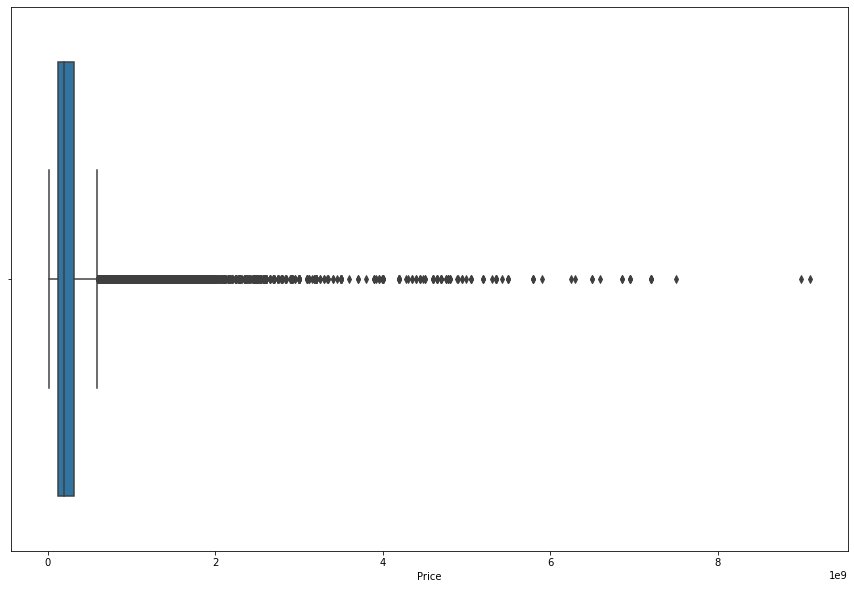

In [37]:
plt.figure(figsize = (15,10))
sns.boxplot(x = cars['Price'])

#### Dropping rows that their price column is the outlier

In [38]:
tempData = cars.sort_values(by='Price')['Price']
Q1, Q3 = tempData.quantile([0.25, 0.75])
IQR = Q3 - Q1
Lower_range = Q1 - (1.5 * IQR)
Upper_range = Q3 + (1.5 * IQR)
outlier_percentage = round((((tempData<(Q1 - 1.5 * IQR)) | (tempData>(Q3 + 1.5 * IQR))).sum()/tempData.shape[0])*100,2)
print(outlier_percentage)
cars = cars[(cars['Price']>Lower_range) & (cars['Price']<Upper_range)].reset_index(drop=True)

9.79


In [39]:
print(f"Skewness of numerical features after drop outliers:\n{cars.skew()}")

Skewness of numerical features after drop outliers:
Model_Year    -1.054998
Mileage        0.936111
Price          0.977621
Year_Time    -35.474145
Month_Time    12.583634
dtype: float64


### 4.5. Encoding the categorical features

In [40]:
for column in CategoricalColumn:
    encoded = pd.get_dummies(cars[column], drop_first= True)
    cars = cars.drop(column, axis = 1)
    cars = cars.join(encoded)

In [41]:
cars.head()

,Model_Year,Mileage,Price,Year_Time,Month_Time,Mashhad,Shiraz,Tehran,آلبالویی,اطلسی,...,گورتان,گوهرشاد,گویم,گیشا (کوی نصر),یاخچی آباد,یافت آباد,یزد آباد,یوسف آباد,۱۰ دی,۱۷ شهریور
0,1997,532,235000000.0,2022,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2013,150000,110000000.0,2022,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020,0,160000000.0,2022,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017,80000,125500000.0,2022,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,80000,187000000.0,2022,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### 4.6. Separate features from target

In [42]:
X = cars.drop(columns = 'Price')
y = cars['Price']

### 4.7. Train, Test and validation split with scaling

In [43]:
x_train, x_test, y_train, Ytest = train_test_split(X, y, test_size=0.20, random_state=4)

scaler = StandardScaler()

normalized_x_train = pd.DataFrame(
    scaler.fit_transform(x_train),
    columns = x_train.columns
)

Xtrain, Xval, Ytrain, Yval = train_test_split(normalized_x_train, y_train, test_size=0.20, random_state=4)

Xtest = pd.DataFrame(
    scaler.transform(x_test),
    columns = x_test.columns
)

## 5. Training Models

### 5.1. training ML models

In [44]:
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
RidgeModel = RidgeCV(alphas=np.arange(0.01, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')
RidgeModel.fit(Xtrain, Ytrain)

r2_score = RidgeModel.score(Xtest, Ytest)
Ypredict = RidgeModel.predict(Xtest)
mae = metrics.mean_absolute_error(Ytest, Ypredict)
print(f'The r2_score of Ridge model is {round(r2_score, 2)}\nThe MAE of Ridge Model is {round(mae, 2)}')

The r2_score of Ridge model is 0.69
The MAE of Ridge Model is 38833558.95


In [45]:
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
LassoModel = LassoCV(alphas=np.arange(0, 1, 0.01), cv=cv)
LassoModel.fit(Xtrain, Ytrain)

r2_score = LassoModel.score(Xtest, Ytest)
Ypredict = LassoModel.predict(Xtest)
mae = metrics.mean_absolute_error(Ytest, Ypredict)
print(f'The r2_score of Lasso model is {round(r2_score, 2)}\nThe MAE of Lasso Model is {round(mae, 2)}')

The r2_score of Lasso model is 0.69
The MAE of Lasso Model is 38834043.47


In [46]:
ENModel = ElasticNet(alpha=0.1, l1_ratio=0.5)
ENModel.fit(Xtrain, Ytrain)

r2_score = ENModel.score(Xtest, Ytest)
Ypredict = ENModel.predict(Xtest)
mae = metrics.mean_absolute_error(Ytest, Ypredict)
print(f'The r2_score of Elastic Net model is {round(r2_score, 2)}\nThe MAE of Elastic Net Model is {round(mae, 2)}')

The r2_score of Elastic Net model is 0.69
The MAE of Elastic Net Model is 40125444.56


In [47]:
KNNModel = KNeighborsRegressor(n_neighbors=20)
KNNModel.fit(Xtrain, Ytrain) 

r2_score = KNNModel.score(Xtest, Ytest)
Ypredict = KNNModel.predict(Xtest)
mae = metrics.mean_absolute_error(Ytest, Ypredict)
print(f'The r2_score of KNN model is {round(r2_score, 2)}\nThe MAE of KNN Model is {round(mae, 2)}')

The r2_score of KNN model is 0.4
The MAE of KNN Model is 68357061.14


In [48]:
DTModel = DecisionTreeRegressor(max_depth=7, min_samples_leaf=10, random_state=0) 
DTModel.fit(Xtrain, Ytrain)

r2_score = DTModel.score(Xtest, Ytest)
Ypredict = DTModel.predict(Xtest)
mae = metrics.mean_absolute_error(Ytest, Ypredict)
print(f'The r2_score of Decision Tree model is {round(r2_score, 2)}\nThe MAE of Decision Tree Model is {round(mae, 2)}')

The r2_score of Decision Tree model is 0.54
The MAE of Decision Tree Model is 56393993.96


### 5.2. Training Ensemble based models

In [49]:
RFModel = RandomForestRegressor(n_estimators=500, random_state=0)
RFModel.fit(Xtrain, Ytrain)  

r2_score = RFModel.score(Xtest, Ytest)
Ypredict = RFModel.predict(Xtest)
mae = metrics.mean_absolute_error(Ytest, Ypredict)
print(f'The r2_score of Random Forest model is {round(r2_score, 2)}\nThe MAE of Random Forest Model is {round(mae, 2)}')

The r2_score of Random Forest model is 0.67
The MAE of Random Forest Model is 36710485.88


In [50]:
GBRparams = {'n_estimators': 1000,
             'max_depth': 3,
             'min_samples_split': 5,
             'learning_rate': 0.01,
             'loss': 'squared_error'}

GBRModel = GradientBoostingRegressor(**GBRparams)
GBRModel.fit(Xtrain, Ytrain)

r2_score = GBRModel.score(Xtest, Ytest)
Ypredict = GBRModel.predict(Xtest)
mae = metrics.mean_absolute_error(Ytest, Ypredict)
print(f'The r2_score of Gradient Boosting model is {round(r2_score, 2)}\nThe MAE of Gradient Boosting Model is {round(mae, 2)}')

The r2_score of Gradient Boosting model is 0.58
The MAE of Gradient Boosting Model is 55342679.75


In [51]:
CBmodel = CatBoostRegressor(verbose=0)
CBparameters = {'depth' : [6,8,10],
              'learning_rate' : [0.01, 0.05, 0.1],
              'iterations' : [30, 50, 100]}

grid = GridSearchCV(estimator=CBmodel, param_grid=CBparameters, cv=2)
grid.fit(Xtrain, Ytrain)

r2_score = grid.score(Xtest, Ytest)
Ypredict = grid.predict(Xtest)
mae = metrics.mean_absolute_error(Ytest, Ypredict)
print(f'The r2_score of Cat Boost model is {round(r2_score, 2)}\nThe MAE of Cat Boost Model is {round(mae, 2)}')

The r2_score of Cat Boost model is 0.61
The MAE of Cat Boost Model is 51199576.96


In [52]:
XGmodel = XGBRegressor(n_estimators=500, max_depth=7, eta=0.01, subsample=0.7, colsample_bytree=0.8)
eval_set = [(Xval, Yval)]
XGmodel.fit(Xtrain, Ytrain, eval_metric="error", eval_set=eval_set, verbose=False)

r2_score = XGmodel.score(Xtest, Ytest)
Ypredict = XGmodel.predict(Xtest)
mae = metrics.mean_absolute_error(Ytest, Ypredict)
print(f'The r2_score of XGBoost model is {round(r2_score, 2)}\nThe MAE of XGBoost Model is {round(mae, 2)}')

The r2_score of XGBoost model is 0.63
The MAE of XGBoost Model is 50135235.73


In [53]:
LGBMModel = LGBMRegressor()
LGBMModel.fit(Xtrain, Ytrain)

r2_score = LGBMModel.score(Xtest, Ytest)
Ypredict = LGBMModel.predict(Xtest)
mae = metrics.mean_absolute_error(Ytest, Ypredict)
print(f'The r2_score of LightBM model is {round(r2_score, 2)}\nThe MAE of LightBM Model is {round(mae, 2)}')

The r2_score of LightBM model is 0.66
The MAE of LightBM Model is 41731699.6


In [54]:
ETModel = ExtraTreesRegressor(n_estimators=500, max_depth=10, max_features=0.3, random_state=0)
ETModel.fit(Xtrain, Ytrain)

r2_score = ETModel.score(Xtest, Ytest)
Ypredict = ETModel.predict(Xtest)
mae = metrics.mean_absolute_error(Ytest, Ypredict)
print(f'The r2_score of Extra Trees model is {round(r2_score, 2)}\nThe MAE of Extra Trees Model is {round(mae, 2)}')

The r2_score of Extra Trees model is 0.55
The MAE of Extra Trees Model is 58026459.5


### 5.3. Training Deep Learning model

In [55]:
numberOfColumns = len(cars.columns)

SeqModel = Sequential()

SeqModel.add(Dropout(0.2, input_shape=(numberOfColumns-1,)))
SeqModel.add(Dense(1024, activation='relu', kernel_regularizer=keras.regularizers.l1(l=0.1), 
                     kernel_initializer='Ones'))
SeqModel.add(Dropout(0.2))
SeqModel.add(Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l1(l=0.1),
                     kernel_initializer='Ones'))
SeqModel.add(Dropout(0.2))

SeqModel.add(Dense(1, activation = 'linear'))

SeqModel.summary()
SeqModel.compile(optimizer='adam',loss='mae')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 1811)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1855488   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               262400    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 2,118,145
Trainable params: 2,118,145
Non-trainable params: 0
______________________________________________

2022-11-10 02:26:58.653421: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [56]:
cb = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=25)

In [57]:
SeqModel.fit(x=Xtrain, y=Ytrain, validation_data=(Xval, Yval), batch_size=128, epochs=500, callbacks=[cb])

2022-11-10 02:26:59.461910: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/500
251/251 [==============================] - 7s 24ms/step - loss: 199468672.0000 - val_loss: 200162704.0000
Epoch 2/500
251/251 [==============================] - 6s 23ms/step - loss: 197980240.0000 - val_loss: 198605168.0000
Epoch 3/500
251/251 [==============================] - 6s 25ms/step - loss: 195130800.0000 - val_loss: 195883872.0000
Epoch 4/500
251/251 [==============================] - 6s 23ms/step - loss: 190703328.0000 - val_loss: 191930752.0000
Epoch 5/500
251/251 [==============================] - 6s 23ms/step - loss: 185581264.0000 - val_loss: 187386192.0000
Epoch 6/500
251/251 [==============================] - 6s 22ms/step - loss: 180405392.0000 - val_loss: 182699968.0000
Epoch 7/500
251/251 [==============================] - 6s 23ms/step - loss: 175206544.0000 - val_loss: 177984128.0000
Epoch 8/500
251/251 [==============================] - 6s 24ms/step - loss: 170684528.0000 - val_loss: 173490144.0000
Epoch 9/500
251/251 [==============================] - 6

In [58]:
Ypredict = SeqModel.predict(Xtest)
r2_score = metrics.r2_score(Ytest, Ypredict)
mae = metrics.mean_absolute_error(Ytest, Ypredict)
print(f'The r2_score of Neural Network model is {round(r2_score, 2)}\nThe MAE of Neural Network Model is {round(mae, 2)}')

The r2_score of Neural Network model is 0.66
The MAE of Neural Network Model is 37989809.1
